In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("E:/wine_quality/winequality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


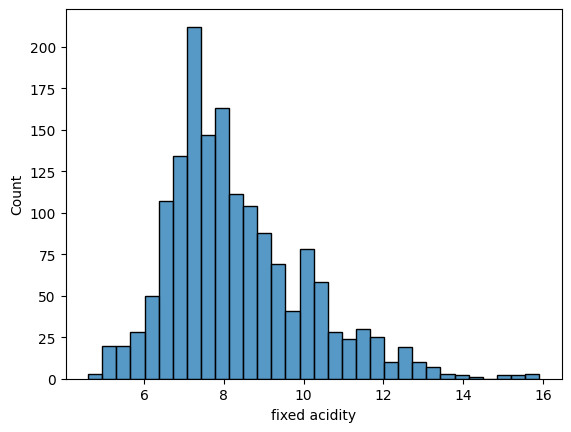

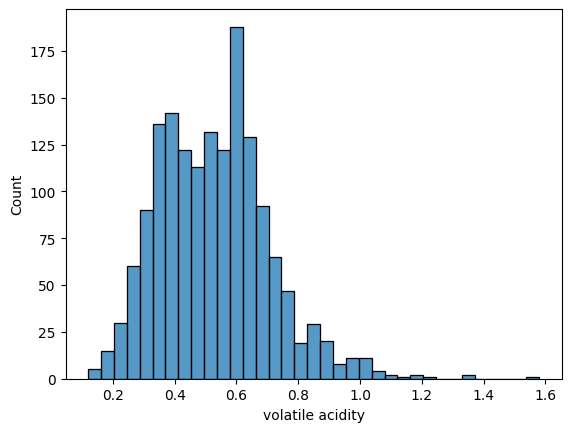

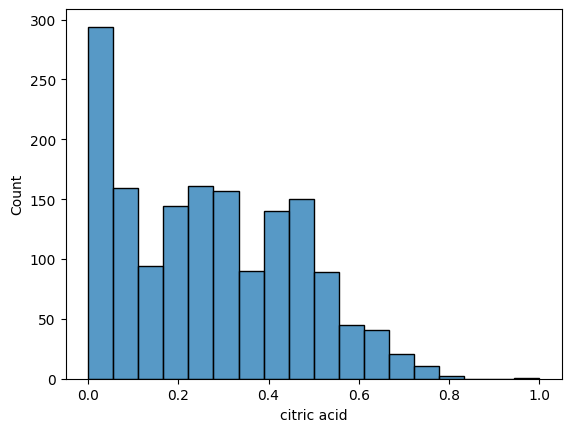

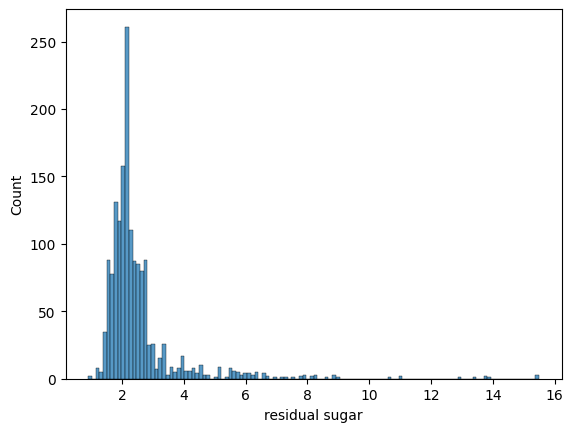

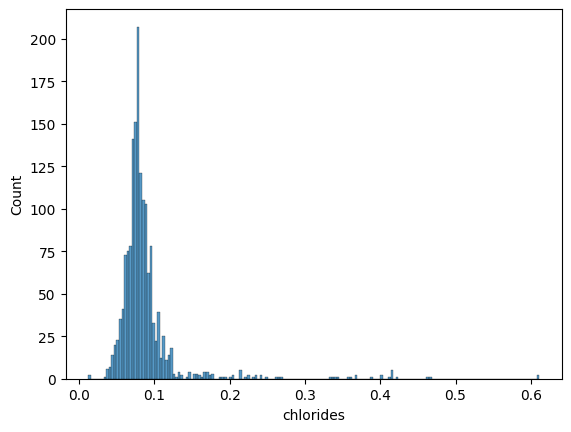

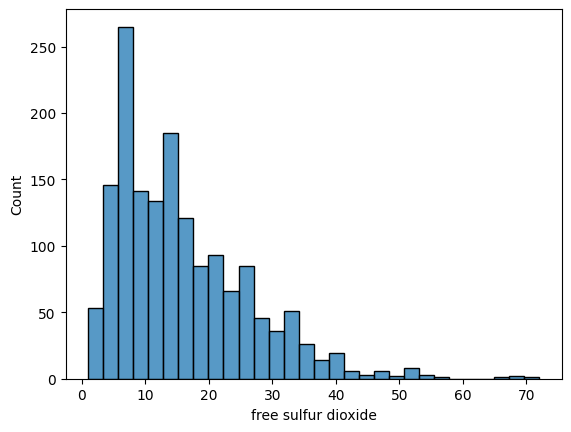

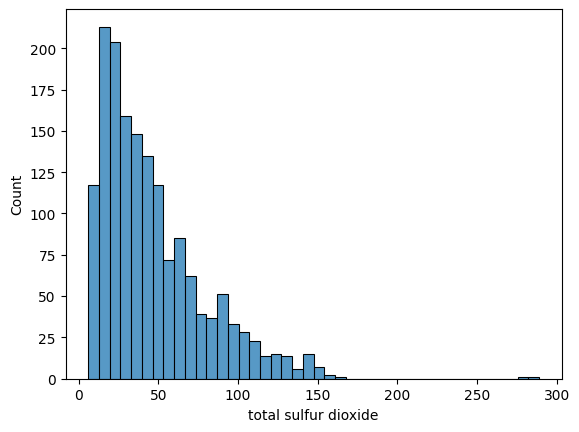

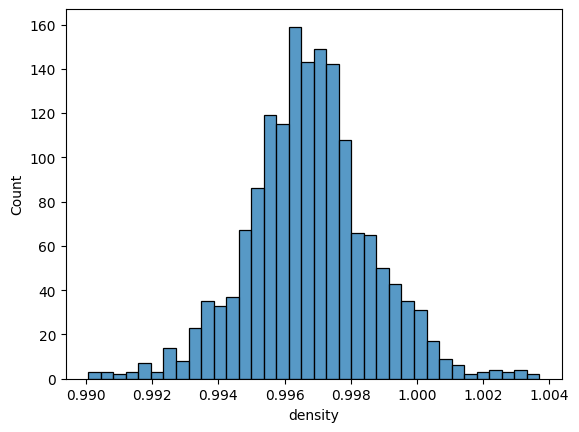

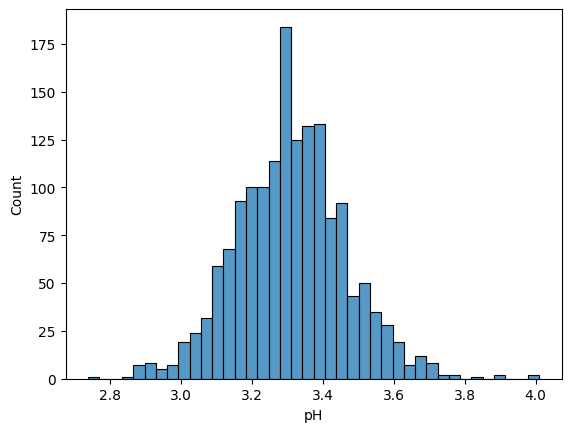

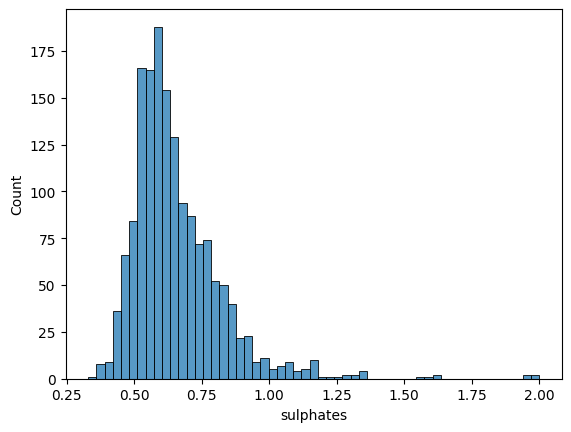

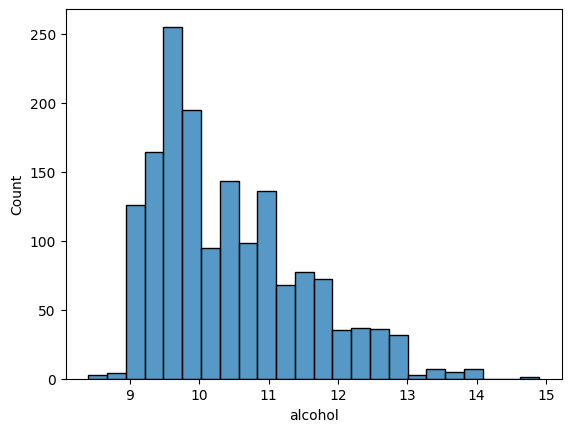

In [7]:
for column in df.columns[:-1]:
    sns.histplot(data=df,x=column)
    plt.show()
    

C:\Users\user\AppData\Local\Temp\ipykernel_14576\491801129.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="quality",palette="Set1")


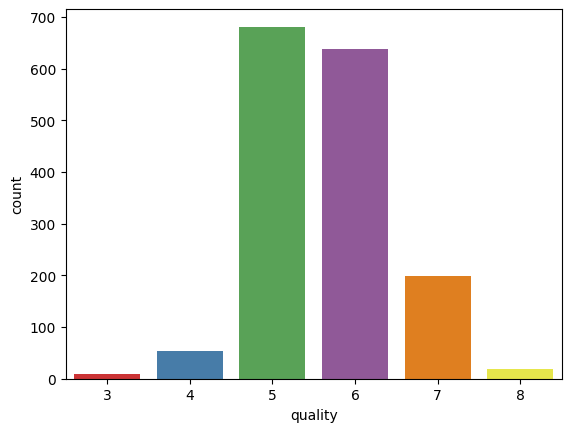

In [8]:
sns.countplot(data=df,x="quality",palette="Set1")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14576\3349980674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="quality",y="fixed acidity",palette="Set2")


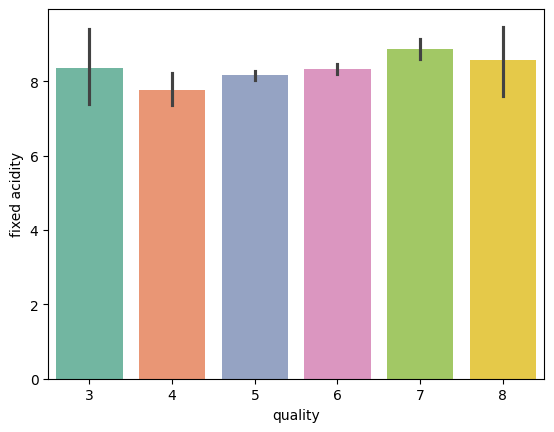

In [9]:
sns.barplot(data=df,x="quality",y="fixed acidity",palette="Set2")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14576\1585323182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="quality",y="volatile acidity",palette="Set2")


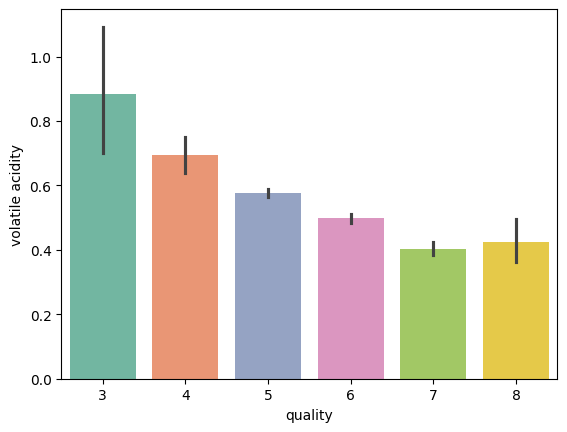

In [10]:
sns.barplot(data=df,x="quality",y="volatile acidity",palette="Set2")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14576\3029889553.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="quality",y="pH",palette="Set2")


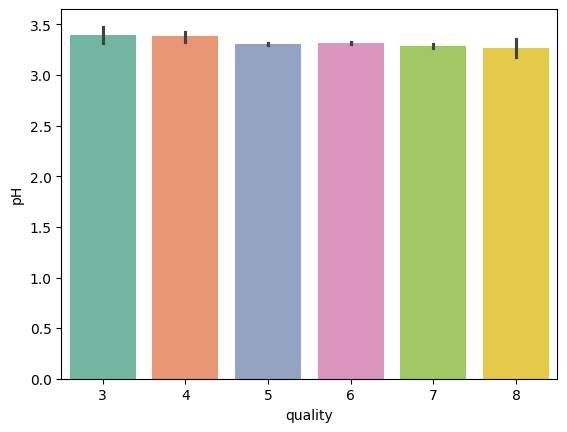

In [11]:
sns.barplot(data=df,x="quality",y="pH",palette="Set2")
plt.show()

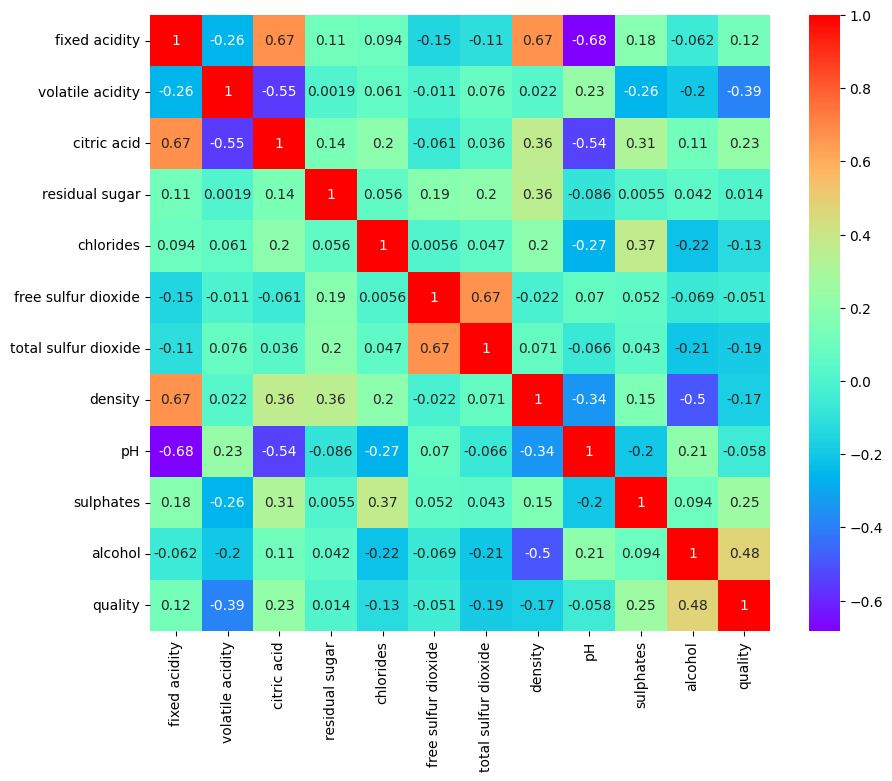

In [12]:
cor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap="rainbow")
plt.show()

# Data Preprocess

In [13]:
train_data=df.drop(columns="quality",axis=1)


### label Binarize

### Good==1
### Bad==0

In [14]:
y=df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [15]:
y.value_counts()


quality
0    1382
1     217
Name: count, dtype: int64

In [16]:
label_data=y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, label_data, test_size=0.2, random_state=42)


In [17]:
print(f"Train Data Shape : {X_train.shape}\nTrain Label Shape : {y_train.shape}")
print("=========================================================================")
print(f"Test Data Shape : {X_test.shape}\nTest Label Shape : {y_test.shape}")

Train Data Shape : (1279, 11)
Train Label Shape : (1279,)
Test Data Shape : (320, 11)
Test Label Shape : (320,)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [21]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


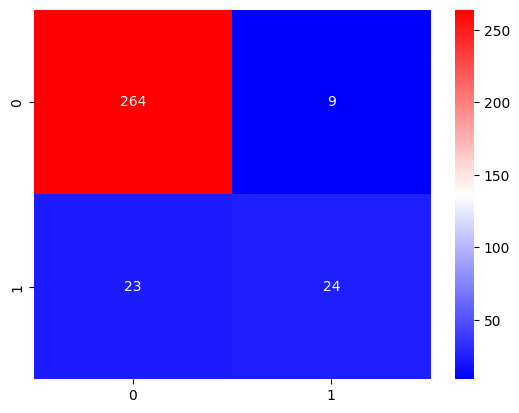

In [22]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap="bwr",fmt="d")
plt.show()

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



# custom Data Prediction

In [27]:
input_data=np.array([7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4])
input_re=input_data.reshape(1,-1)
pred=rf_classifier.predict(input_re)
if pred==1:
    print("Good Wine Quality")
else:
    print("Wine Quality Bad")
    

Wine Quality Bad


e:\wine_quality\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
